In [1]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Arsenal/PassDead.csv'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(path, sep=';')

data.head()

,Season,Squad,PassDead-S,PassDead-G
0,2024-2025,Arsenal,82,11
1,2024-2025,Aston Villa,85,7
2,2024-2025,Bournemouth,68,6
3,2024-2025,Brentford,74,11
4,2024-2025,Brighton,70,7


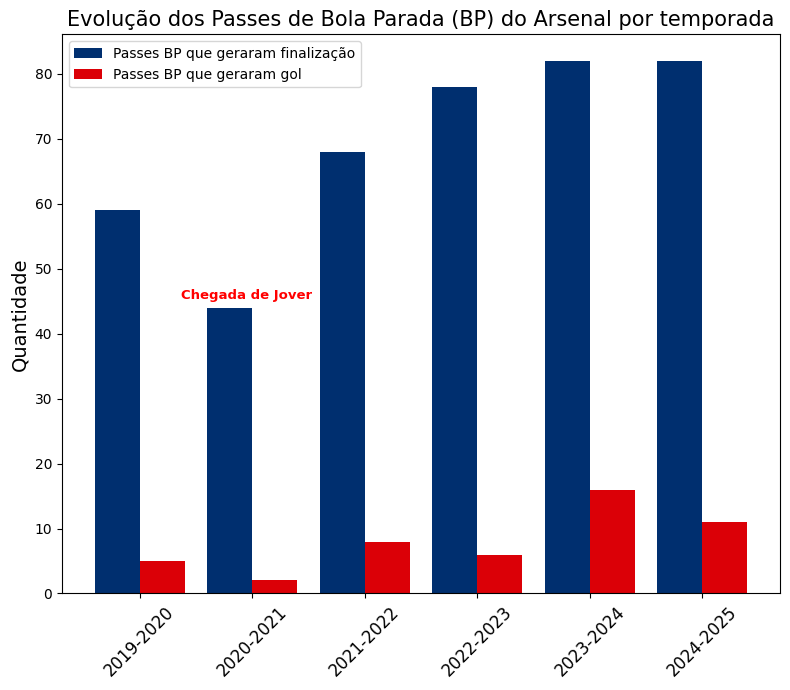

In [39]:
# Filtrar apenas Arsenal
df_arsenal = data[data["Squad"] == "Arsenal"]

# Garantir ordem cronológica
df_arsenal = df_arsenal.sort_values("Season")

# Plotar gráfico de barras lado a lado
plt.figure(figsize=(8,7))
x = range(len(df_arsenal))

plt.bar([i - 0.2 for i in x],
        df_arsenal["PassDead-S"],
        width=0.4,
        label="Passes BP que geraram finalização",
        color="#002f6f")   # azul

plt.bar([i + 0.2 for i in x],
        df_arsenal["PassDead-G"],
        width=0.4,
        label="Passes BP que geraram gol",
        color="#db0007")   # vermelho

plt.xticks(x, df_arsenal["Season"], rotation=45, fontsize=12)   # eixo X maior
plt.ylabel("Quantidade", fontsize=14)                          # eixo Y maior
plt.title("Evolução dos Passes de Bola Parada (BP) do Arsenal por temporada", fontsize=15)  # título maior
plt.legend()
plt.tight_layout()

# Adicionar rótulo na temporada 2020–2021
idx = df_arsenal.index[df_arsenal["Season"] == "2020-2021"][0]
x_pos = list(x)[list(df_arsenal.index).index(idx)]
y_max = max(df_arsenal.loc[idx, ["PassDead-S", "PassDead-G"]])

plt.text(x_pos - 0.05, y_max + 1.3, "Chegada de Jover", ha="center",
         fontsize=9.5, fontweight="bold", color="red")

plt.show()
